In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [37]:
df=pd.read_csv("C:/Users/water/OneDrive/바탕 화면/iris-classification/AAME.csv")
data = df[["Close"]].values 

In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [41]:
# 4. 시퀀스 생성 함수
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

In [43]:
# 5. 시퀀스 생성
window = 60  # 60일간의 데이터를 기반으로 다음 값 예측
X, y = create_sequences(scaled_data, window)


In [45]:
# 6. 훈련/테스트 데이터 분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [47]:
# 7. LSTM 입력 형태 조정
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [49]:
# 8. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window, 1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

C:\Users\water\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# 9. 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0103
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.7780e-04
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.1987e-04
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.2780e-04
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.5361e-04
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.4274e-04
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.3368e-04
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.3635e-04
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.2641e-04
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.1517e-04


In [31]:
# 10. 예측 및 되돌리기
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test.reshape(-1, 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


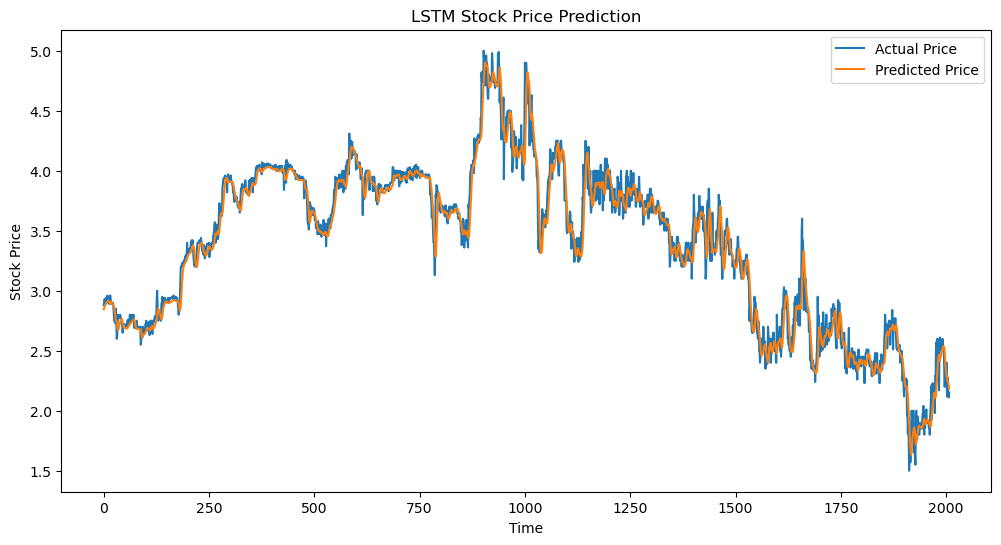

In [53]:
# 11. 시각화
plt.figure(figsize=(12,6))
plt.plot(real, label="Actual Price")
plt.plot(predicted, label="Predicted Price")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()